In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
import datetime

from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [2]:
# reading the dataset
# Note: Our Dataset is very large so setting low_memory to false
dataset = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', low_memory = False)

In [3]:
dataset.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
# shape of the dataset
dataset.shape

(230755, 53)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230755 entries, 0 to 230754
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      230755 non-null  int64  
 1   Created Date                    230755 non-null  object 
 2   Closed Date                     229126 non-null  object 
 3   Agency                          230755 non-null  object 
 4   Agency Name                     230755 non-null  object 
 5   Complaint Type                  230755 non-null  object 
 6   Descriptor                      226012 non-null  object 
 7   Location Type                   230627 non-null  object 
 8   Incident Zip                    228802 non-null  float64
 9   Incident Address                197379 non-null  object 
 10  Street Name                     197379 non-null  object 
 11  Cross Street 1                  193586 non-null  object 
 12  Cross Street 2  

In [9]:
dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City', 'Status',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude'],
      dtype='object')

In [12]:
drop_columns = ['Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2','Intersection Street 1',
'Intersection Street 2','Address Type','Park Facility Name','Park Borough','School Name',
'School Number','School Region','School Code','School Phone Number','School Address','School City',
'School State','School Zip','School Not Found','School or Citywide Complaint','Vehicle Type',
'Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction',
'Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Landmark',
'X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date','Resolution Action Updated Date','Community Board','Facility Type',
'Location']

dataset = dataset.drop(columns=drop_columns, errors='ignore')


In [13]:
# checking the shape of our dataset
dataset.shape

(230755, 14)

In [14]:
# checking the info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230755 entries, 0 to 230754
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unique Key              230755 non-null  int64  
 1   Created Date            230755 non-null  object 
 2   Closed Date             229126 non-null  object 
 3   Agency                  230755 non-null  object 
 4   Complaint Type          230755 non-null  object 
 5   Descriptor              226012 non-null  object 
 6   Location Type           230627 non-null  object 
 7   Incident Zip            228802 non-null  float64
 8   City                    228803 non-null  object 
 9   Status                  230755 non-null  object 
 10  Resolution Description  230755 non-null  object 
 11  Borough                 230754 non-null  object 
 12  Latitude                228107 non-null  float64
 13  Longitude               228107 non-null  float64
dtypes: float64(3), int64

In [15]:
# checking the number of null values in the columns
dataset.isnull().sum()

Unique Key                   0
Created Date                 0
Closed Date               1629
Agency                       0
Complaint Type               0
Descriptor                4743
Location Type              128
Incident Zip              1953
City                      1952
Status                       0
Resolution Description       0
Borough                      1
Latitude                  2648
Longitude                 2648
dtype: int64

In [18]:
# choosing the closed cases only to eliminate the null values

dataset = dataset[dataset['Status'] == 'Closed']

In [19]:
dataset.isnull().sum()

Unique Key                   0
Created Date                 0
Closed Date                  0
Agency                       0
Complaint Type               0
Descriptor                4732
Location Type               62
Incident Zip               376
City                       375
Status                       0
Resolution Description       0
Borough                      1
Latitude                  1071
Longitude                 1071
dtype: int64

In [20]:
# since all the cases are of closed cases we can now drop the column Status as every value of its data are same
dataset = dataset.drop(['Status'], axis = 1)
dataset.shape

(229063, 13)

In [21]:
# out of the remaining columns only Descriptor, Latitude and Longitude has over 1k null values
dataset = dataset[(dataset['Descriptor'].notnull()) & (dataset['Latitude'].notnull()) &(dataset['Longitude'].notnull())]

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223316 entries, 0 to 230753
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unique Key              223316 non-null  int64  
 1   Created Date            223316 non-null  object 
 2   Closed Date             223316 non-null  object 
 3   Agency                  223316 non-null  object 
 4   Complaint Type          223316 non-null  object 
 5   Descriptor              223316 non-null  object 
 6   Location Type           223261 non-null  object 
 7   Incident Zip            223280 non-null  float64
 8   City                    223281 non-null  object 
 9   Resolution Description  223316 non-null  object 
 10  Borough                 223316 non-null  object 
 11  Latitude                223316 non-null  float64
 12  Longitude               223316 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 23.9+ MB


In [22]:
# rechecking remaining null values
dataset.isnull().sum()

Unique Key                 0
Created Date               0
Closed Date                0
Agency                     0
Complaint Type             0
Descriptor                 0
Location Type             55
Incident Zip              36
City                      35
Resolution Description     0
Borough                    0
Latitude                   0
Longitude                  0
dtype: int64

In [23]:
# still there are few null values in our dataset. we will remove them
dataset = dataset[(dataset['Location Type'].notnull()) & (dataset['Incident Zip'].notnull()) &(dataset['City'].notnull())]

# rechecking for null values
dataset.isnull().sum()

Unique Key                0
Created Date              0
Closed Date               0
Agency                    0
Complaint Type            0
Descriptor                0
Location Type             0
Incident Zip              0
City                      0
Resolution Description    0
Borough                   0
Latitude                  0
Longitude                 0
dtype: int64

In [24]:
# checking the shape our datset
dataset.shape

(223224, 13)

In [26]:
# converting 'Created Date' and 'Closed Date' to datetime datatype

cols = ['Created Date', 'Closed Date']
for col in cols:
    dataset[col] = pd.to_datetime(dataset[col],infer_datetime_format=True)
    
# creating a new column Request_Closing_Time
dataset['Request_Closing_Time'] = dataset[cols[1]] - dataset[cols[0]]

# viewing the info to see the data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223224 entries, 0 to 230753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   Unique Key              223224 non-null  int64          
 1   Created Date            223224 non-null  datetime64[ns] 
 2   Closed Date             223224 non-null  datetime64[ns] 
 3   Agency                  223224 non-null  object         
 4   Complaint Type          223224 non-null  object         
 5   Descriptor              223224 non-null  object         
 6   Location Type           223224 non-null  object         
 7   Incident Zip            223224 non-null  float64        
 8   City                    223224 non-null  object         
 9   Resolution Description  223224 non-null  object         
 10  Borough                 223224 non-null  object         
 11  Latitude                223224 non-null  float64        
 12  Longitude            

C:\Users\tredd\AppData\Local\Temp\ipykernel_16084\2242377464.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset[col] = pd.to_datetime(dataset[col],infer_datetime_format=True)
C:\Users\tredd\AppData\Local\Temp\ipykernel_16084\2242377464.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset[col] = pd.to_datetime(dataset[col],infer_datetime_format=True)


In [27]:
# applying describe on the dataset
dataset.describe()

,Unique Key,Created Date,Closed Date,Incident Zip,Latitude,Longitude,Request_Closing_Time
count,2.232240e+05,223224,223224,223224.000000,223224.000000,223224.000000,223224
mean,3.153279e+07,2015-09-14 14:28:38.143851520,2015-09-14 18:55:31.721893376,10863.094690,40.725270,-73.924827,0 days 04:26:53.578042683
min,3.076770e+07,2015-06-04 19:36:00,2015-06-04 19:52:00,83.000000,40.499673,-74.254937,0 days 00:01:00
25%,3.115361e+07,2015-07-24 13:30:05,2015-07-24 19:31:25.249999872,10314.000000,40.667619,-73.970263,0 days 01:18:02.750000
50%,3.152595e+07,2015-09-13 18:25:10.500000,2015-09-13 22:15:08,11209.000000,40.717108,-73.930125,0 days 02:47:00
75%,3.191388e+07,2015-11-04 22:00:00,2015-11-05 02:17:15,11238.000000,40.783819,-73.875095,0 days 05:30:00
max,3.231065e+07,2015-12-31 23:59:45,2016-01-03 16:22:00,11697.000000,40.912869,-73.700760,24 days 01:21:36
std,4.435370e+05,NaN,NaN,574.281313,0.082855,0.079195,0 days 06:09:41.720647398


In [28]:
# viewing the columns
dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude',
       'Request_Closing_Time'],
      dtype='object')

In [29]:
# All the complaints are under the same agency
dataset['Agency'].value_counts()

Agency
NYPD    223224
Name: count, dtype: int64

In [30]:
# complaint types
dataset['Complaint Type'].value_counts()

Complaint Type
Blocked Driveway            59898
Illegal Parking             57471
Noise - Street/Sidewalk     36655
Noise - Commercial          25523
Derelict Vehicle            13397
Noise - Vehicle             12506
Animal Abuse                 5967
Traffic                      3334
Noise - Park                 3209
Vending                      2750
Drinking                     1002
Noise - House of Worship      636
Posting Advertisement         614
Disorderly Youth              187
Graffiti                       75
Name: count, dtype: int64

<Axes: title={'center': 'Complaint Types'}, xlabel='Complaint Type', ylabel='Count'>

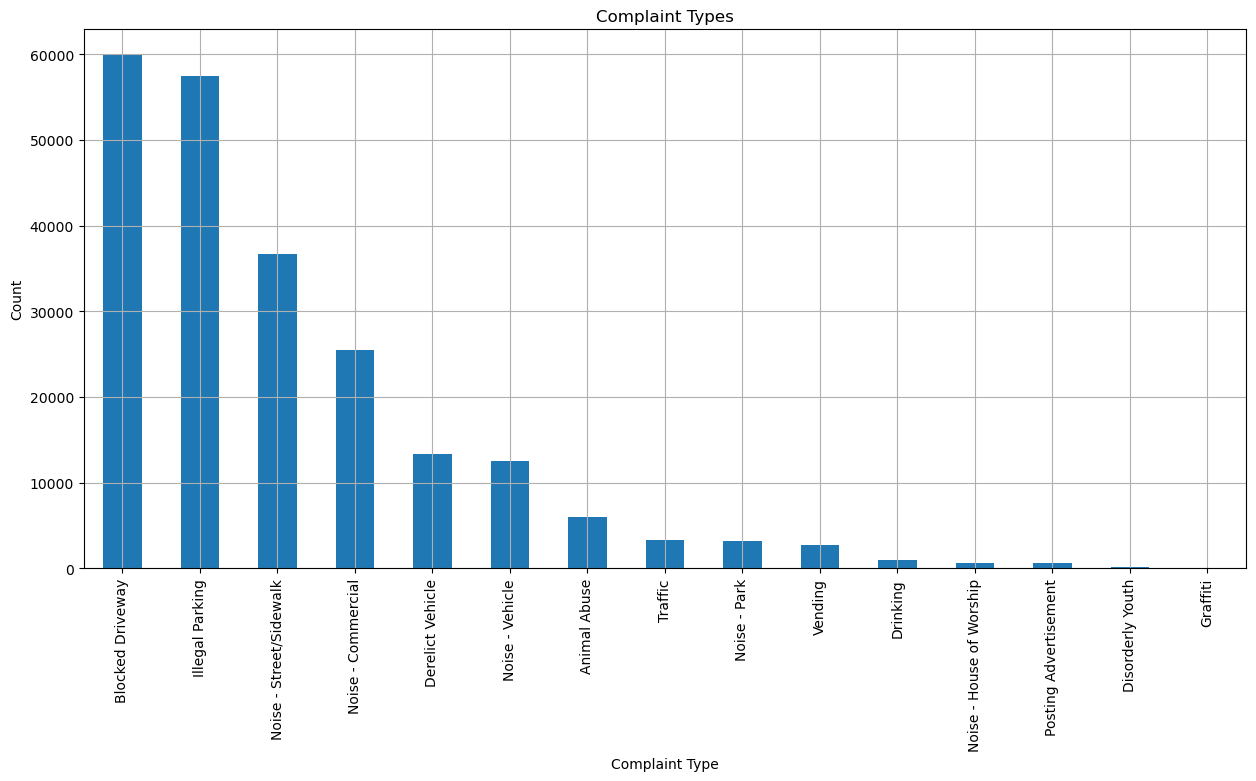

In [31]:
dataset['Complaint Type'].value_counts().plot(kind = 'bar', figsize=(15, 7), title='Complaint Types', ylabel='Count', grid=True)

In [32]:
dataset['Descriptor'].value_counts()

Descriptor
Loud Music/Party                  45666
No Access                         44557
Posted Parking Sign Violation     17349
Loud Talking                      15856
Partial Access                    15341
With License Plate                13397
Blocked Hydrant                   12401
Commercial Overnight Parking       9124
Blocked Sidewalk                   8350
Car/Truck Music                    8235
Double Parked Blocking Traffic     4363
Double Parked Blocking Vehicle     3209
Banging/Pounding                   3154
Engine Idling                      3066
Neglected                          2883
Car/Truck Horn                     2490
Congestion/Gridlock                2010
Other (complaint details)          1510
In Prohibited Area                 1474
Overnight Commercial Storage       1319
Unlicensed                         1276
Unauthorized Bus Layover           1011
Truck Route Violation               770
In Public                           737
Tortured                     

<Axes: title={'center': 'Top 10 Descriptors'}, ylabel='Descriptor'>

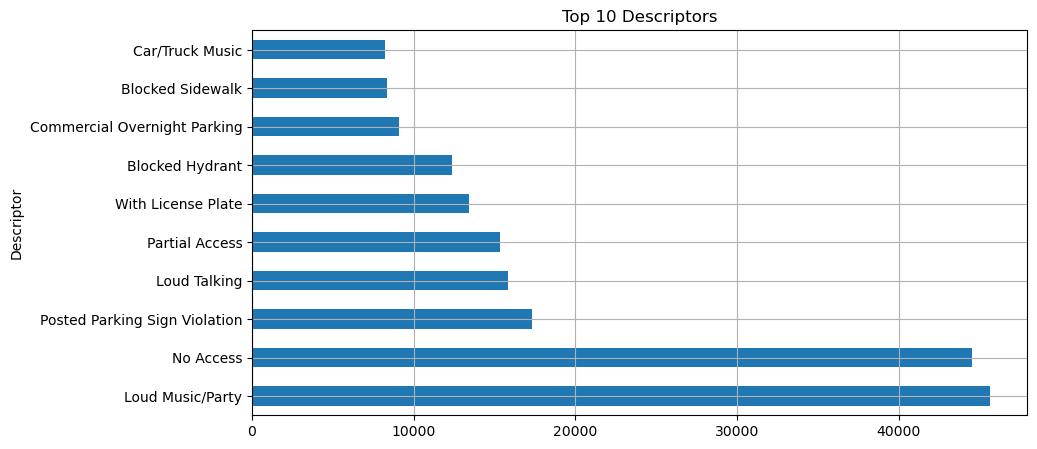

In [33]:
dataset['Descriptor'].value_counts().head(10).plot(kind='barh', grid=True, figsize=(10,5), title='Top 10 Descriptors')

In [34]:
dataset['Location Type'].value_counts().head(10)

Location Type
Street/Sidewalk               187513
Store/Commercial               13989
Club/Bar/Restaurant            12643
Residential Building/House      4340
Park/Playground                 3457
House of Worship                 636
Residential Building             169
Highway                          154
Parking Lot                       91
House and Store                   72
Name: count, dtype: int64

<Axes: title={'center': 'Top 10 Location Type'}, ylabel='Location Type'>

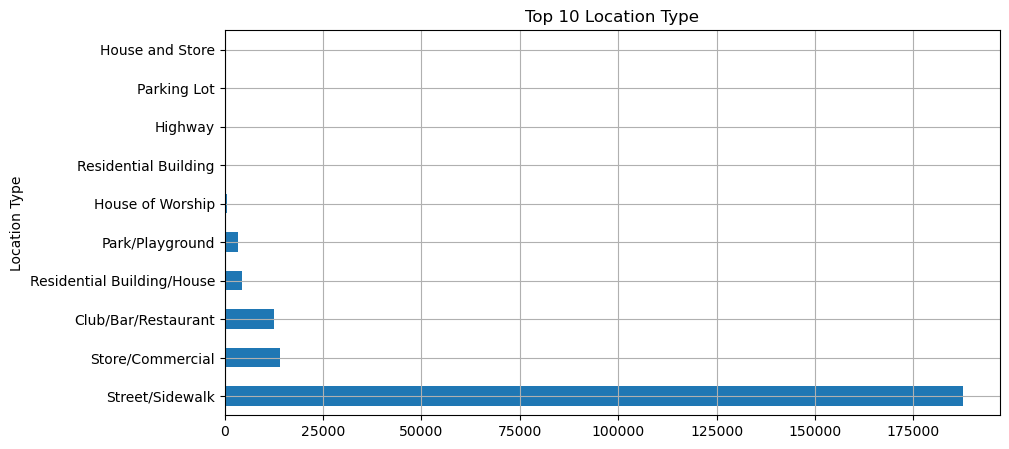

In [35]:
dataset['Location Type'].value_counts().head(10).plot(kind='barh', grid=True, figsize=(10, 5), title='Top 10 Location Type')

In [36]:
dataset['City'].value_counts().head(10)

City
BROOKLYN         74502
NEW YORK         46212
BRONX            31251
STATEN ISLAND     9645
JAMAICA           5430
ASTORIA           4810
FLUSHING          4631
RIDGEWOOD         3891
CORONA            3329
WOODSIDE          2700
Name: count, dtype: int64

Text(0.5, 0, 'Complaint Counts')

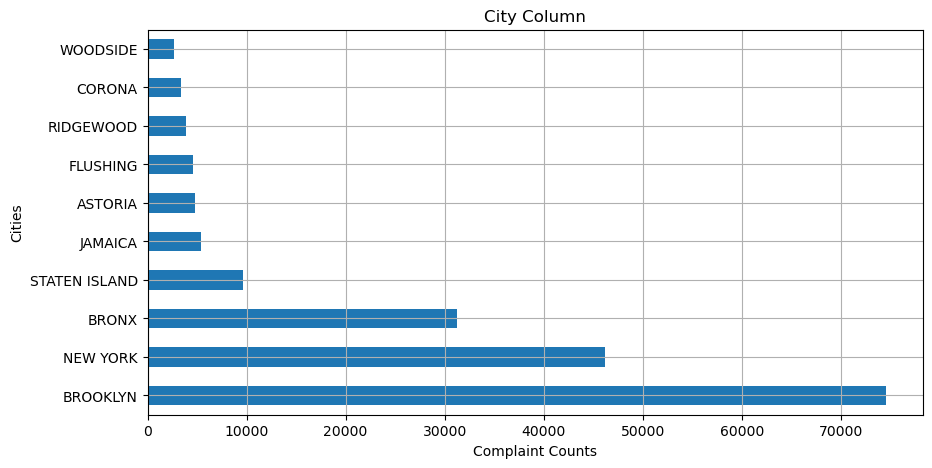

In [37]:
dataset['City'].value_counts().head(10).plot(kind='barh', grid=True, figsize=(10, 5), title='City Column', ylabel='Cities')
plt.xlabel('Complaint Counts')

Text(0.5, 0, 'Complaint Counts')

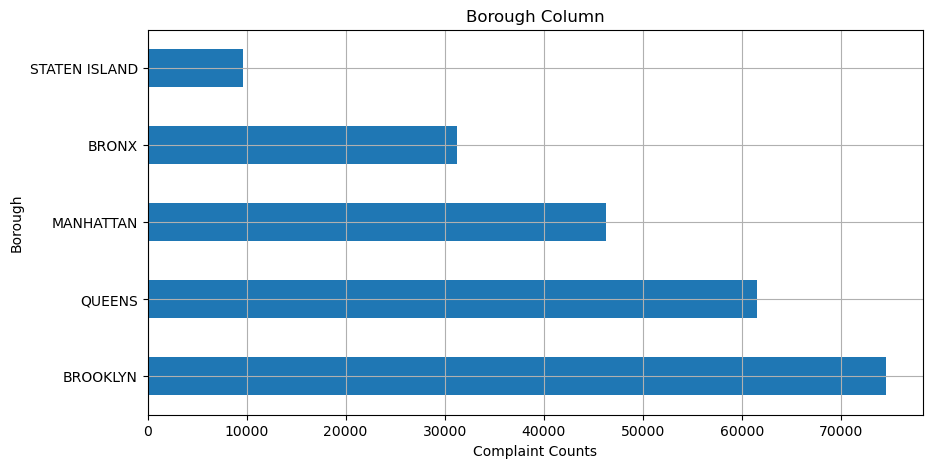

In [38]:
# Borough
dataset['Borough'].value_counts().head(10).plot(kind='barh', grid=True, figsize=(10, 5), title='Borough Column', ylabel='Borough')
plt.xlabel('Complaint Counts')

In [39]:
# Top Complaints
top_6_complaints = dataset['Complaint Type'].value_counts()[:6].keys()
top_6_complaints

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle', 'Noise - Vehicle'],
      dtype='object', name='Complaint Type')

In [40]:
# Borough per Complaints
borough_complaints = dataset.groupby(['Borough', 'Complaint Type']).size().unstack()
borough_complaints = borough_complaints[top_6_complaints]
borough_complaints

Complaint Type,Blocked Driveway,Illegal Parking,Noise - Street/Sidewalk,Noise - Commercial,Derelict Vehicle,Noise - Vehicle
Borough,,,,,,
BRONX,9947,6130,6931,1915,1473,2547
BROOKLYN,22000,21255,10332,8132,4014,3846
MANHATTAN,1563,9106,15459,10365,423,3970
QUEENS,24671,17140,3348,4570,6108,1897
STATEN ISLAND,1717,3840,585,541,1379,246


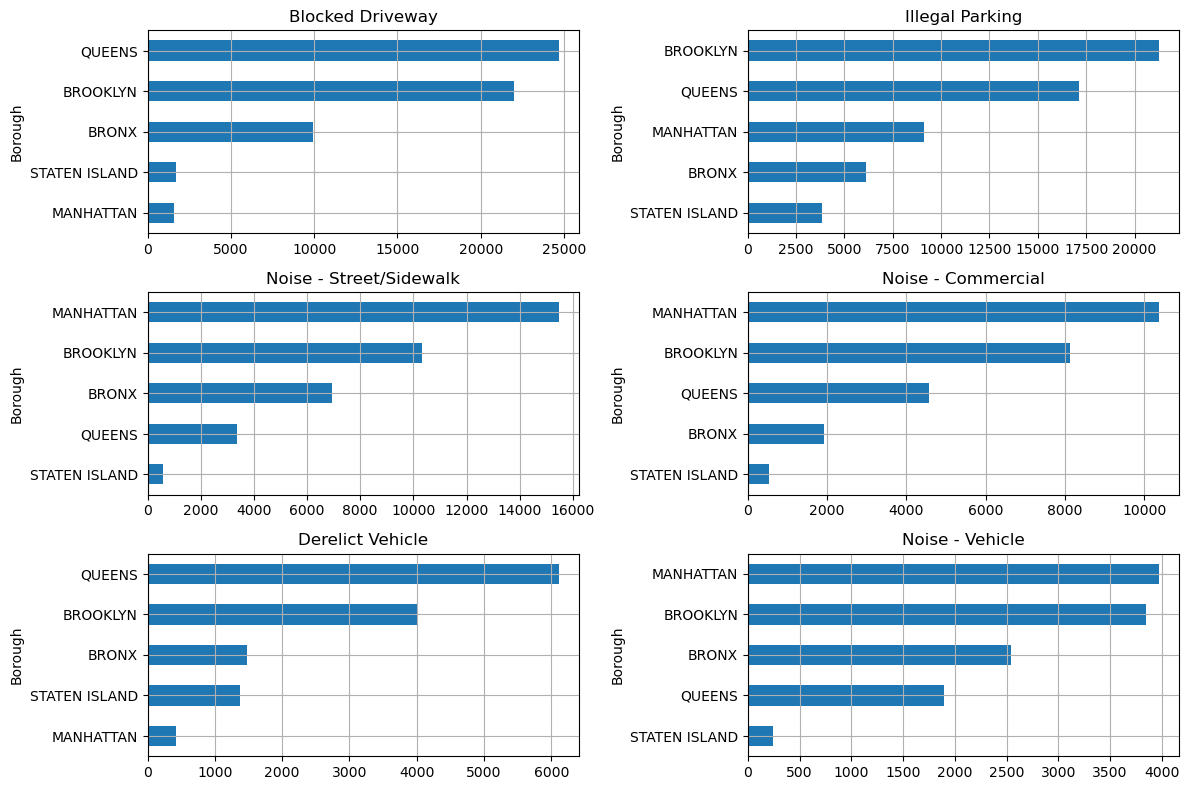

In [42]:
# Plotting Borough per Complaint Type 
col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,8))

for i, (label, col) in enumerate(borough_complaints.items()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax, grid=True)
    ax.set_title(label)
    
plt.tight_layout()

ANALYSIS:

- Blocked Driveway is maximum in QUEENS
- Illegal Parking is maximum in BROOKLYN
- Noise - Street/Sidewalk is maximum in MANHATTAN
- Noise - Commercial is maximum in MANHATTAN
- Derelict Vehicle is maximum in QUEENS
- Noise - Vehicle is maximum in QUEENS

In [43]:
top_borough = dataset['Borough'].value_counts().keys()

complaint_per_borough = dataset.groupby(['Complaint Type', 'Borough']).size().unstack()
complaint_per_borough = complaint_per_borough[top_borough]
complaint_per_borough

Borough,BROOKLYN,QUEENS,MANHATTAN,BRONX,STATEN ISLAND
Complaint Type,,,,,
Animal Abuse,1850,1463,1171,1070,413
Blocked Driveway,22000,24671,1563,9947,1717
Derelict Vehicle,4014,6108,423,1473,1379
Disorderly Youth,60,32,43,43,9
Drinking,189,274,228,154,157
Graffiti,28,23,14,8,2
Illegal Parking,21255,17140,9106,6130,3840
Noise - Commercial,8132,4570,10365,1915,541
Noise - House of Worship,264,168,133,60,11


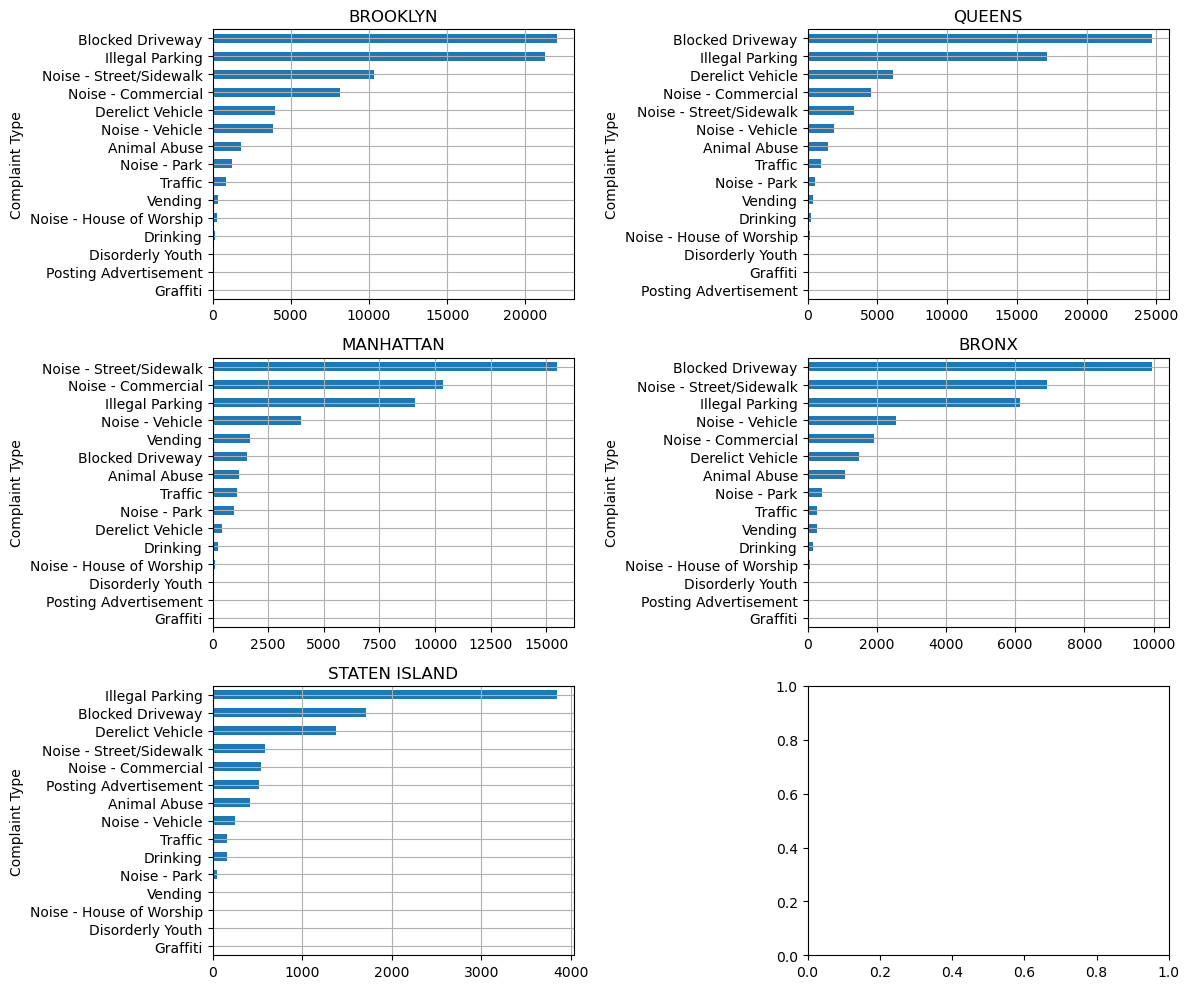

In [45]:
# Plotting Complaints per Borough
col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,10))

for i, (label,col) in enumerate(complaint_per_borough.items()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax, grid=True)
    ax.set_title(label)
    
plt.tight_layout()

ANALYSIS:

- BROOKLYN, QUEENS and BRONX has most complaints of Blocked Driveway.
- MANHATTAN has most complaints of Noise - Street/Sidewalk.
- STATEN ISLAND has most complaints of Illegal Parking.

In [48]:
# Ensure 'Request_Closing_Time' is in timedelta format
dataset['Request_Closing_Time'] = pd.to_timedelta(dataset['Request_Closing_Time'], errors='coerce')

# Convert to hours (handling NaT values)
dataset['Request_Closing_Time_in_Hours'] = dataset['Request_Closing_Time'].dt.total_seconds() / 3600  # Converts seconds to hours

# Optionally round up if needed
dataset['Request_Closing_Time_in_Hours'] = np.ceil(dataset['Request_Closing_Time_in_Hours'])

# View first 20 entries
dataset[['Request_Closing_Time', 'Request_Closing_Time_in_Hours']].head(20)

,Request_Closing_Time,Request_Closing_Time_in_Hours
0,0 days 00:55:15,1.0
1,0 days 01:26:16,2.0
2,0 days 04:51:31,5.0
3,0 days 07:45:14,8.0
4,0 days 03:27:02,4.0
5,0 days 01:53:30,2.0
6,0 days 01:57:28,2.0
7,0 days 01:47:55,2.0
8,0 days 08:33:02,9.0
9,0 days 01:23:02,2.0


In [49]:
data_avg_time_in_hrs = dataset.groupby(['City', 'Complaint Type'])['Request_Closing_Time_in_Hours'].mean()
data_avg_time_in_hrs.head(10)

City     Complaint Type          
ARVERNE  Animal Abuse                2.575758
         Blocked Driveway            3.103448
         Derelict Vehicle            3.545455
         Disorderly Youth            4.000000
         Illegal Parking             2.816327
         Noise - Commercial          3.000000
         Noise - House of Worship    1.666667
         Noise - Park                1.500000
         Noise - Street/Sidewalk     2.520000
         Noise - Vehicle             3.000000
Name: Request_Closing_Time_in_Hours, dtype: float64

In [50]:
# Creating a column Request_Closing_Time_in_Seconds for time in seconds
dataset['Request_Closing_Time_in_Seconds'] = dataset['Request_Closing_Time'].astype('timedelta64[s]')

# viewing the Three columns side by side
dataset[['Request_Closing_Time', 'Request_Closing_Time_in_Hours','Request_Closing_Time_in_Seconds']].head()

,Request_Closing_Time,Request_Closing_Time_in_Hours,Request_Closing_Time_in_Seconds
0,0 days 00:55:15,1.0,0 days 00:55:15
1,0 days 01:26:16,2.0,0 days 01:26:16
2,0 days 04:51:31,5.0,0 days 04:51:31
3,0 days 07:45:14,8.0,0 days 07:45:14
4,0 days 03:27:02,4.0,0 days 03:27:02


In [51]:
#  Order the complaint types based on the average ‘Request_Closing_Time’ in seconds, grouping them for different locations.
data_avg_in_seconds = dataset.groupby(['City', 'Complaint Type']).Request_Closing_Time_in_Seconds.mean()
data_avg_in_seconds.head(10)

City     Complaint Type          
ARVERNE  Animal Abuse               0 days 02:06:47
         Blocked Driveway           0 days 02:35:45
         Derelict Vehicle           0 days 03:07:28
         Disorderly Youth           0 days 03:35:28
         Illegal Parking            0 days 02:18:40
         Noise - Commercial         0 days 02:17:14
         Noise - House of Worship   0 days 01:13:32
         Noise - Park               0 days 01:17:00
         Noise - Street/Sidewalk    0 days 02:01:49
         Noise - Vehicle            0 days 02:20:38
Name: Request_Closing_Time_in_Seconds, dtype: timedelta64[s]

In [52]:
# lets analyse the Request_Closing_Time
dataset['Request_Closing_Time'].describe()

count                       223224
mean     0 days 04:26:53.578042683
std      0 days 06:09:41.720647398
min                0 days 00:01:00
25%         0 days 01:18:02.750000
50%                0 days 02:47:00
75%                0 days 05:30:00
max               24 days 01:21:36
Name: Request_Closing_Time, dtype: object

In [54]:
# Compute mean and standard deviation (convert to float if needed)
mean_hrs = dataset['Request_Closing_Time_in_Hours'].mean()
std_hrs = dataset['Request_Closing_Time_in_Hours'].std()

mean_seconds = dataset['Request_Closing_Time_in_Seconds'].mean()
std_seconds = dataset['Request_Closing_Time_in_Seconds'].std()

# Convert Timedelta to float if needed
if isinstance(mean_hrs, pd.Timedelta):
    mean_hrs = mean_hrs.total_seconds() / 3600  # Convert to hours
if isinstance(std_hrs, pd.Timedelta):
    std_hrs = std_hrs.total_seconds() / 3600  # Convert to hours

if isinstance(mean_seconds, pd.Timedelta):
    mean_seconds = mean_seconds.total_seconds()  # Convert to seconds
if isinstance(std_seconds, pd.Timedelta):
    std_seconds = std_seconds.total_seconds()  # Convert to seconds

# Print results
print('The mean hours is {:.2f} hours and mean seconds is {:.2f} seconds'.format(mean_hrs, mean_seconds))
print('The standard deviation is {:.2f} hours and {:.2f} seconds'.format(std_hrs, std_seconds))


The mean hours is 4.95 hours and mean seconds is 16013.00 seconds
The standard deviation is 6.16 hours and 22181.00 seconds


In [55]:
# for analysing on the basis of month we will need to separate months from Created Date column
dataset['Year-Month'] = dataset['Created Date'].apply(lambda x:datetime.datetime.strftime(x, '%Y-%m'))
# viewing the months that we have in our dataset
dataset['Year-Month'].unique()

array(['2015-12', '2015-11', '2015-10', '2015-09', '2015-08', '2015-07',
       '2015-06'], dtype=object)

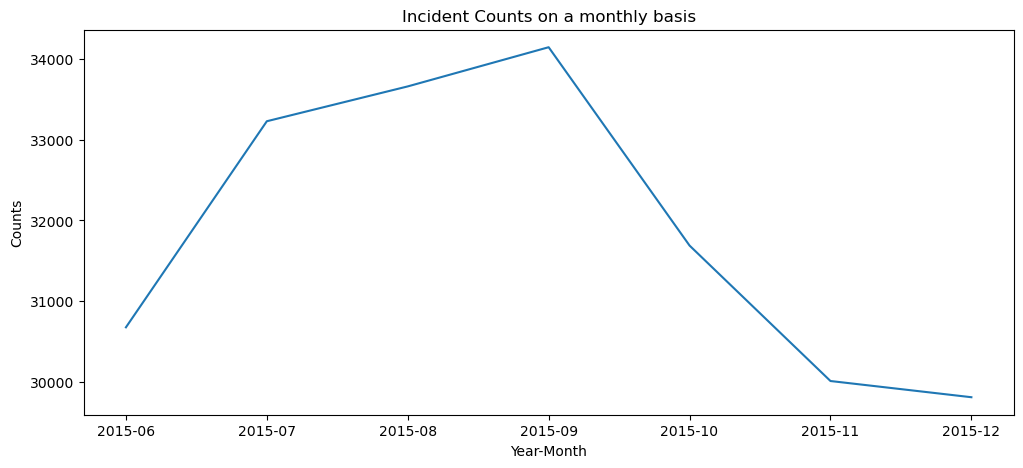

In [56]:
# plotting the month column
#dataset['Year-Month'].value_counts().plot()
monthly_incidents =  dataset.groupby('Year-Month').size().plot(figsize=(12,5),
                                                               title='Incident Counts on a monthly basis', ylabel='Counts')

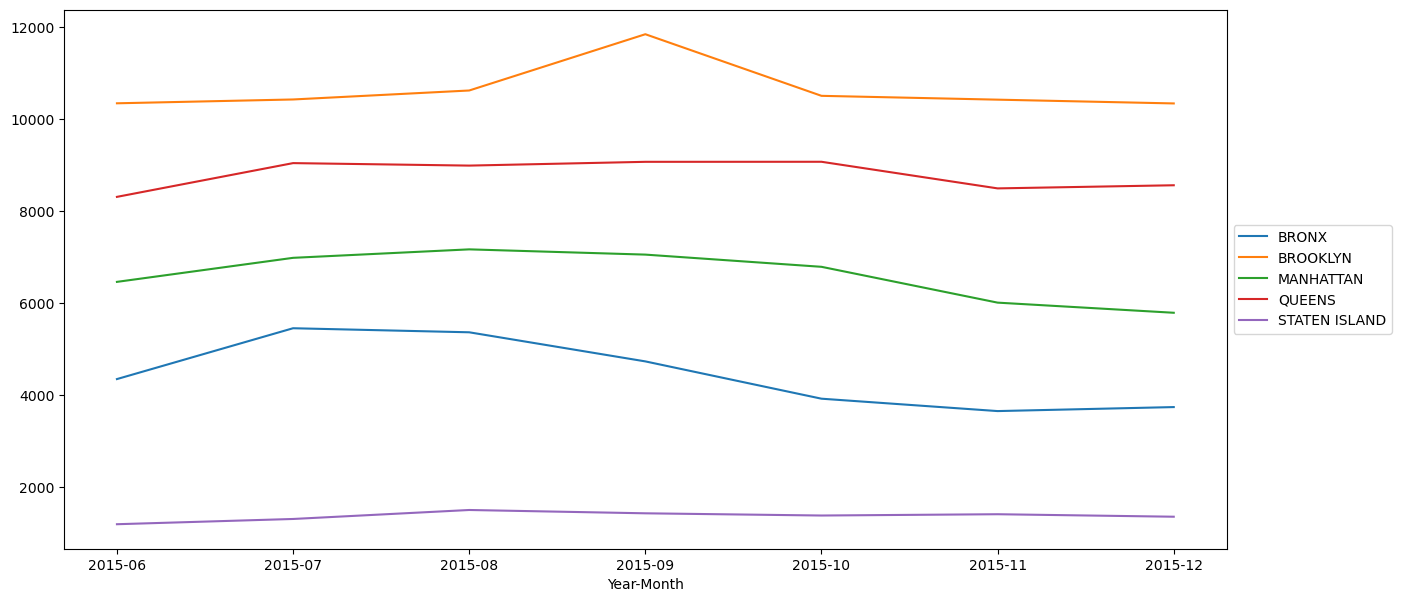

In [57]:
# plotting Borough on the basis of Year-Month
dataset.groupby(['Year-Month','Borough']).size().unstack().plot(figsize=(15,7))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

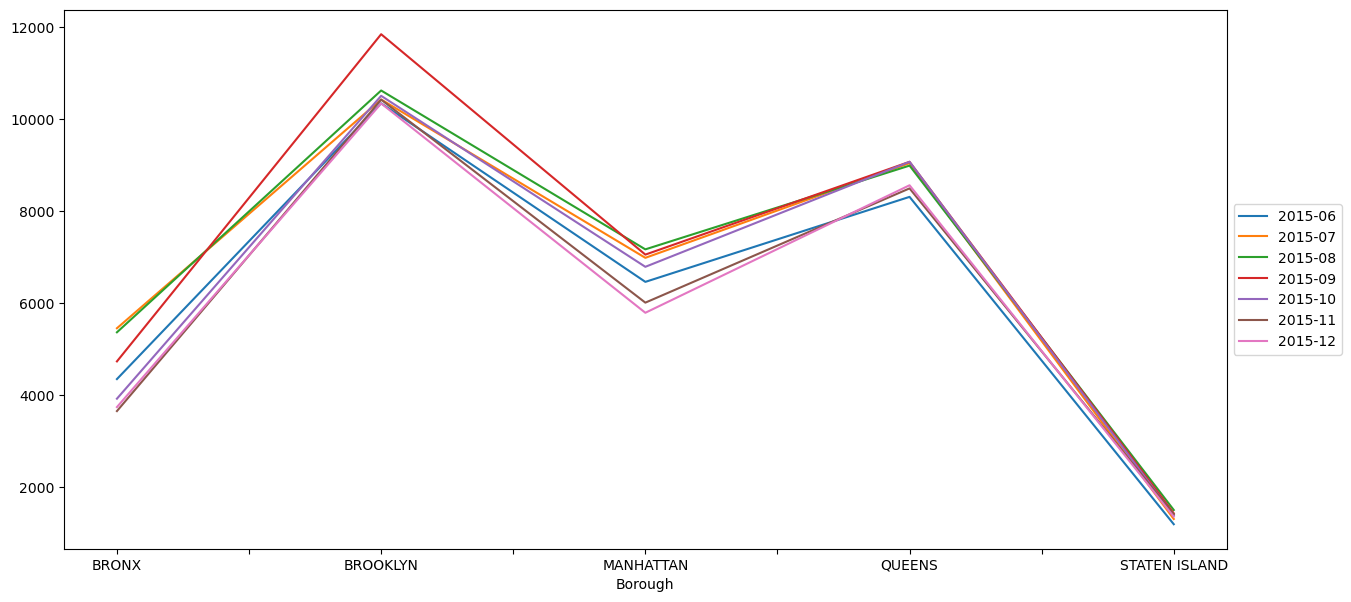

In [58]:
# Plotting Year-Month on the basis of Borough
dataset.groupby(['Borough', 'Year-Month']).size().unstack().plot(figsize=(15,7))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

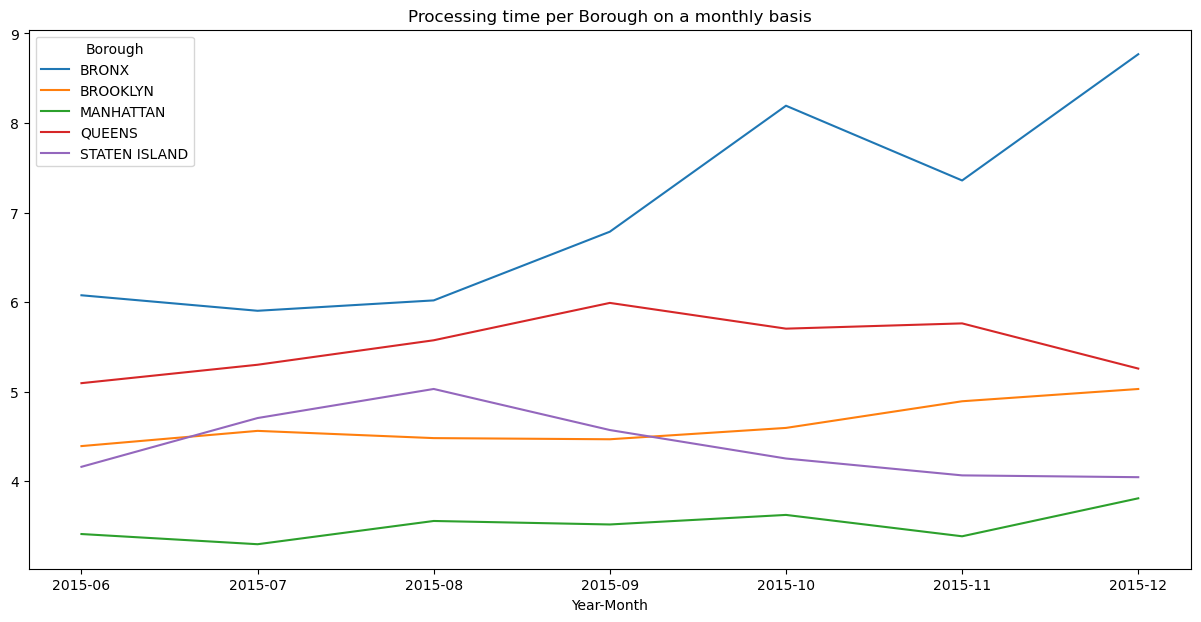

In [59]:
# Processing time per Borough on a monthly basis
dataset.groupby(['Year-Month','Borough'])['Request_Closing_Time_in_Hours'].mean().unstack().plot(figsize=(15,7),
                                                                        title='Processing time per Borough on a monthly basis');

Perform a statistical test for the following:

Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’

.
a. Whether the average response time across complaint types is similar or not (overal


l)
b. Are the type of complaint or service requested and location related?

In [60]:
dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude',
       'Request_Closing_Time', 'Request_Closing_Time_in_Hours',
       'Request_Closing_Time_in_Seconds', 'Year-Month'],
      dtype='object')

In [61]:
avg_response_time = dataset.groupby(['Complaint Type']).Request_Closing_Time_in_Seconds.mean().sort_values(ascending=True)
avg_response_time

Complaint Type
Posting Advertisement      0 days 01:52:51
Noise - House of Worship   0 days 03:14:05
Noise - Commercial         0 days 03:16:03
Noise - Park               0 days 03:29:17
Noise - Street/Sidewalk    0 days 03:31:17
Traffic                    0 days 03:35:39
Disorderly Youth           0 days 03:40:08
Noise - Vehicle            0 days 03:44:48
Drinking                   0 days 03:58:46
Vending                    0 days 04:13:00
Illegal Parking            0 days 04:36:24
Blocked Driveway           0 days 04:54:37
Animal Abuse               0 days 05:20:44
Derelict Vehicle           0 days 07:26:05
Graffiti                   0 days 07:34:40
Name: Request_Closing_Time_in_Seconds, dtype: timedelta64[s]

# Testing for our Hypothesis

Below We conduct ANOVA (Analysis of Variance) test for top 5 type of complaints

For a 95% of confidence interval we choose our alpha as 0.05 for 5%

Alpha(0.05) is the critical p-value, if our calculated p-value is less than alpha, it will give us strong evidence to reject Null Hypothesis.

if p < alpha(0.05) : Reject Null Hypothesis, Average response time for all the complaints type is not same.

if p > alpha(0.05) : Fail to reject Null Hypothesis, Average response time for all the complaints type is same.

In [64]:
import numpy as np

data = {}

for complaint in dataset['Complaint Type'].unique():
    subset = dataset.loc[dataset['Complaint Type'] == complaint, 'Request_Closing_Time_in_Seconds']
    
    # Ensure numeric data type
    subset = pd.to_numeric(subset, errors='coerce')  # Convert non-numeric to NaN
    
    # Handle NaN values by dropping them
    subset = subset.dropna()
    
    # Ensure all values are positive before applying log
    subset = subset[subset > 0]  # Remove zero and negative values
    
    # Apply log transformation (adding 1 to avoid log(0) issues)
    data[complaint] = np.log(subset + 1)

# Check output
print(f"Transformed data available for {len(data)} complaint types.")


Transformed data available for 15 complaint types.


In [65]:
data.keys()

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Noise - Park', 'Graffiti', 'Disorderly Youth'])

In [66]:
for complaint in data.keys():
    print(data[complaint].std())

1.0979133557521388
0.9893036703389181
1.0846215567050461
1.2624156743777388
1.0952803927173678
1.146556873178735
1.2134874558502207
1.0797103256187457
1.0566140280599905
1.1060373064363085
1.1915029444484093
1.0571361722282628
1.1362734511756438
1.114965418284271
1.0631564459404304


In [67]:
# importing f_oneway from scipy.stats library
from scipy.stats import f_oneway
# taking top 5 complaints
stat, p = f_oneway(data['Blocked Driveway'], data['Illegal Parking'], data['Noise - Street/Sidewalk'],
                   data['Derelict Vehicle'], data['Noise - Commercial'])
print('Statistics= %.3f, p = %.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('We have Different distributions (reject H0)')

Statistics= 1706.077, p = 0.000
We have Different distributions (reject H0)


As our p-value is quite low , hence it is being converted to 0.0

Since our p-value is lower than our critical p-value, we will conclude that we have enough evidence to reject our Null Hypothesis and that is:

Average response time for all the complaints type is not same.

In [68]:
# getting crosstab from pandas
city_type = pd.crosstab(dataset['City'], dataset['Complaint Type'])
# viewing first 5 entries of city_type
city_type.head()

Complaint Type,Animal Abuse,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Posting Advertisement,Traffic,Vending
City,,,,,,,,,,,,,,,
ARVERNE,33,29,22,2,0,0,49,2,6,2,25,5,0,0,1
ASTORIA,97,2068,267,2,26,2,856,906,6,52,299,143,0,36,50
Astoria,0,79,9,0,0,0,142,172,0,0,70,0,0,0,0
BAYSIDE,28,279,147,1,1,3,381,37,2,3,6,10,0,8,1
BELLEROSE,6,73,62,2,0,0,81,20,0,1,10,5,0,5,0


# Performing Chi-squared test

In [69]:
# contigency table
table = city_type 
# table -->> The contingency table. The table contains the observed frequencies (i.e. number of occurrences) in each category.
# stat -->> chi2 or Test Statistic
# p -->> The p-value of the Test
# dof -->> Degrees of Freedom
# expected -->> The expected frequencies, based on the marginal sums of the table.
stat, p, dof, expected = chi2_contingency(table)

In [70]:
print('The Degrees of Freedom are : {}'. format(dof))
print('The P-Value of the Testing is {}: '.format(p))
print('Expected values : \n')
print(expected)

The Degrees of Freedom are : 714
The P-Value of the Testing is 0.0: 
Expected values : 

[[4.70465541e+00 4.72263198e+01 1.05628069e+01 1.47439343e-01
  7.90022578e-01 5.91334265e-02 4.53127621e+01 2.01234993e+01
  5.01451457e-01 2.53012221e+00 2.89004767e+01 9.86030176e+00
  4.84105652e-01 2.62867792e+00 2.16822564e+00]
 [1.28576094e+02 1.29067385e+03 2.88676710e+02 4.02945024e+00
  2.15909580e+01 1.61608967e+00 1.23837719e+03 5.49966088e+02
  1.37044404e+01 6.91470899e+01 7.89836890e+02 2.69477565e+02
  1.32303874e+01 7.18405727e+01 5.92566212e+01]
 [1.26170304e+01 1.26652403e+02 2.83275275e+01 3.95405512e-01
  2.11869691e+00 1.58585098e-01 1.21520589e+02 5.39675662e+01
  1.34480163e+00 6.78532774e+00 7.75058237e+01 2.64435365e+01
  1.29828334e+00 7.04963624e+00 5.81478694e+00]
 [2.42450140e+01 2.43376546e+02 5.44344649e+01 7.59815253e-01
  4.07130954e+00 3.04738738e-01 2.33515200e+02 1.03704624e+02
  2.58418450e+00 1.30387548e+01 1.48935979e+02 5.08141687e+01
  2.49479447e+00 1.3546

In [71]:
# interpreting test statistics
prob = 0.95 # as aplha is considered 0.05
critical_value = chi2.ppf(prob, dof)
critical_value

777.2732792817321

In [72]:
print('Probability = {}, Critical Value = {}, Test statistic = {}'.format(prob, critical_value, stat))
print()
if abs(stat) >= critical_value:
    print('Dependent (Reject H0 or Null Hypothesis)')
else:
    print('Independent (Failed to reject Null Hypothesis)')


# interpreting the P-Value
alpha = 1 - prob
print('Significance : %.3f, P-Value : %.2f'%(alpha, p))
if p <= alpha:
    print('Dependent (Reject H0 or Null Hypothesis)')
else:
    print('Independent (Failed to reject Null Hypothesis)')

Probability = 0.95, Critical Value = 777.2732792817321, Test statistic = 79425.42362624986

Dependent (Reject H0 or Null Hypothesis)
Significance : 0.050, P-Value : 0.00
Dependent (Reject H0 or Null Hypothesis)
